#Prevendo a postura usando traços de personalidade

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Myers Briggs Table_S1.csv', delimiter=',')

In [3]:
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [4]:
df.shape

(97, 20)

In [5]:
df.set_index("S No", inplace = True)

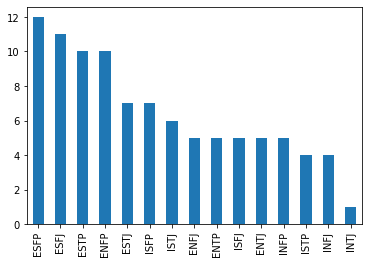

In [6]:
df.MBTI.value_counts().plot.bar()

In [7]:
extroverts = df[df["E"] > df["I"]]
introverts = df[df["I"] >= df["E"]]

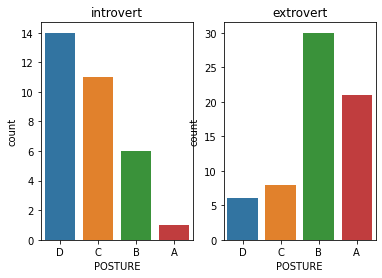

In [8]:
fig, ax =plt.subplots(1,2)
sns.countplot( x = introverts['POSTURE'], ax=ax[0],  order = introverts['POSTURE'].value_counts().index)
sns.countplot( x = extroverts['POSTURE'], ax=ax[1], order = introverts['POSTURE'].value_counts().index)
ax[1].set_title("extrovert")
ax[0].set_title("introvert")

fig.show()

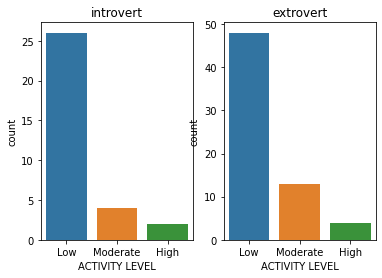

In [9]:
fig, ax =plt.subplots(1,2)
sns.countplot( x = introverts['ACTIVITY LEVEL'], ax=ax[0],  order = introverts['ACTIVITY LEVEL'].value_counts().index)
sns.countplot( x = extroverts['ACTIVITY LEVEL'], ax=ax[1], order = introverts['ACTIVITY LEVEL'].value_counts().index)
ax[1].set_title("extrovert")
ax[0].set_title("introvert")
fig.show()

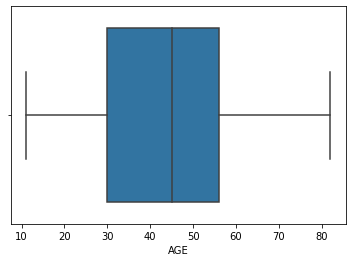

In [10]:
sns.boxplot(x = df.AGE)

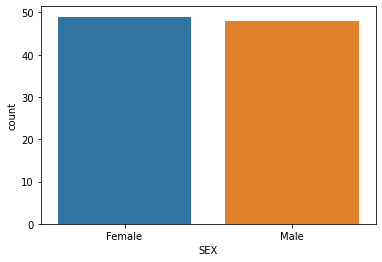

In [11]:
sns.countplot(x = df.SEX)

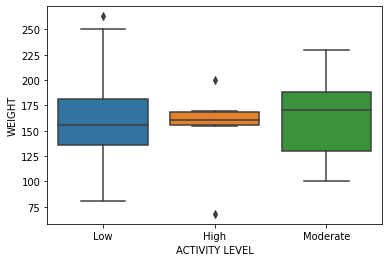

In [12]:
sns.boxplot(x = df["ACTIVITY LEVEL"], y = df.WEIGHT)

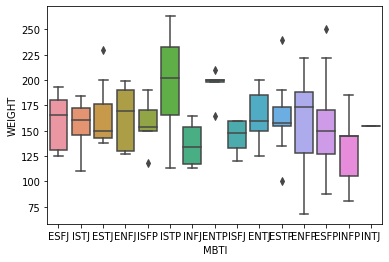

In [13]:
sns.boxplot(x = df["MBTI"], y = df.WEIGHT)

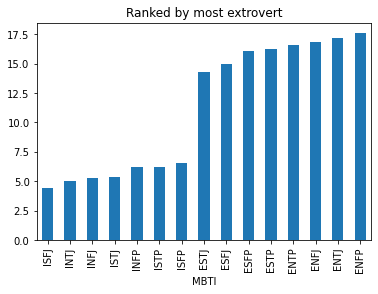

In [14]:
plt.title("Ranked by most extrovert")
df.groupby("MBTI").mean().sort_values("E").E.plot.bar()

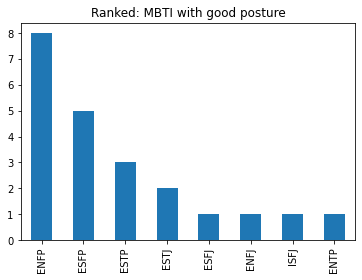

In [15]:
plt.title("Ranked: MBTI with good posture")
df[df["POSTURE"] == "A"].MBTI.value_counts().plot.bar()

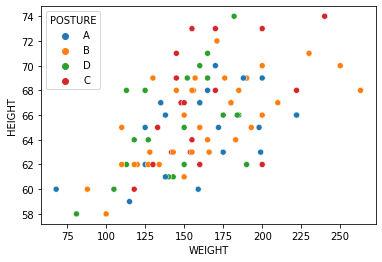

In [16]:
sns.scatterplot(data = df, x = 'WEIGHT', y = 'HEIGHT',  hue  = 'POSTURE')

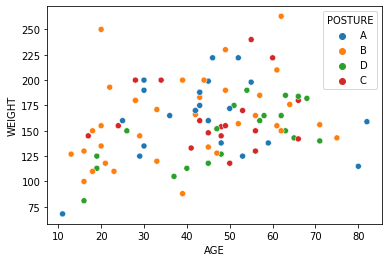

In [17]:
sns.scatterplot(data = df, x = 'AGE', y = 'WEIGHT',  hue  = 'POSTURE')

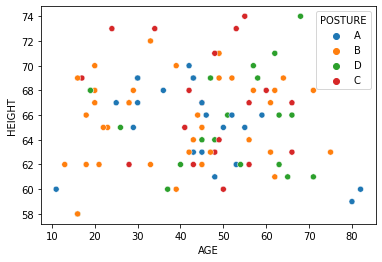

In [18]:
sns.scatterplot(data = df, x = 'AGE', y = 'HEIGHT',  hue  = 'POSTURE')

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.SEX  = le.fit_transform(df.SEX )
df.MBTI = le.fit_transform(df.MBTI)

In [20]:
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace({'Low' : 0, 'Moderate' : 1, 'High': 2})
df.POSTURE = df.POSTURE.replace({'A' : 0, 'B' : 1, 'C': 2, 'D':3})

In [21]:
df.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
S No,,,,,,,,,,,,,,,,,,,
1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0
4,51,66,175,1,1,9.5,9.5,9.5,1.5,13,6,15,21,5,13,11,19,3,3
5,45,63,199,0,1,4.0,5.0,2.0,2.0,0,14,7,20,6,9,15,16,6,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

#XGBOOST

In [23]:
x,y=df.drop("POSTURE",axis=1),df[["POSTURE"]] 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2 4 0 1]
 [2 4 1 0]
 [0 2 1 1]
 [1 1 0 0]]


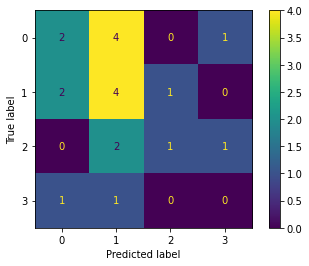

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [26]:
accuracy_score(y_test, y_pred)

0.35

#Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(x_train, y_train)
y_pred = Dtree.predict(x_test)

print(confusion_matrix(y_test, y_pred))

[[2 2 1 2]
 [0 5 0 2]
 [0 2 1 1]
 [1 1 0 0]]


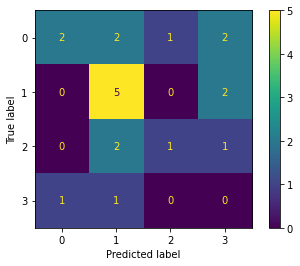

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [29]:
accuracy_score(y_test, y_pred)

0.4

#k-nearest neighbors


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [31]:
Scaler = StandardScaler()
train_scale = pd.DataFrame(Scaler.fit_transform(x_train), columns = x_train.columns)

In [32]:
scaled_model = pd.DataFrame(Scaler.fit_transform(df))
scaled_model

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.547913,-1.003699,-0.956237,-0.989743,-0.517857,-0.835831,-1.180447,-0.754816,-0.817641,-0.563189,0.933351,-0.933122,0.388019,-0.433588,-0.283704,-0.084118,1.347962,-1.351831,-1.316004
1,0.487994,0.878929,-0.067566,1.010363,2.946429,1.899250,1.339572,1.187283,0.151538,1.641582,-1.176203,1.184138,-0.235813,0.203655,1.978158,-1.981663,0.470430,-0.471780,-0.363374
2,-0.830208,0.878929,1.126584,1.010363,2.946429,-0.835831,-1.180447,-0.754816,-0.817641,-0.073240,0.405962,-0.403807,0.180075,-0.221173,0.847227,-0.843136,0.294923,-0.295770,-1.316004
3,0.428076,0.072089,0.432311,1.010363,1.214286,2.876064,1.812075,2.935172,-0.333051,1.641582,-1.176203,1.184138,1.219795,-1.283244,0.470250,-0.463627,1.523469,-1.527841,1.541886
4,0.068566,-0.734752,1.098814,-0.989743,1.214286,0.727072,0.394565,0.022024,-0.171521,-1.543087,0.230166,-0.227369,1.011851,-1.070830,-0.283704,0.295391,0.996949,-0.999811,-1.316004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,-1.669064,-2.079486,-1.650511,1.010363,1.214286,-0.835831,-1.180447,-0.754816,0.151538,0.171735,1.109147,-1.109561,1.427739,-1.495658,1.601181,-1.602154,-1.460141,1.464332,-0.363374
93,0.068566,-1.003699,-0.706298,-0.989743,1.214286,-0.835831,0.079562,-0.754816,-0.817641,-0.563189,-0.297222,0.301946,0.388019,-0.433588,-0.849170,0.864654,0.470430,-0.471780,-0.363374
94,-0.051270,0.878929,0.793333,1.010363,1.214286,-0.054379,-1.180447,-0.754816,-0.817641,-1.298112,-0.121426,0.125508,-1.275532,1.265725,-0.849170,0.864654,-1.460141,1.464332,-1.316004
95,-0.950045,0.341036,0.571165,-0.989743,-0.517857,-0.835831,-1.180447,-0.754816,-0.817641,-0.563189,-0.297222,0.301946,1.427739,0.628483,-0.472193,0.485145,0.645936,-0.647790,-0.363374


In [33]:
x,y=scaled_model, df[["POSTURE"]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
error=[]
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    error.append(accuracy_score(y_test, y_pred))

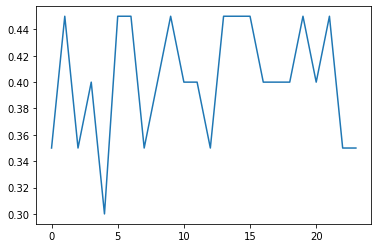

In [35]:
plt.plot(error)

In [36]:
error

[0.35,
 0.45,
 0.35,
 0.4,
 0.3,
 0.45,
 0.45,
 0.35,
 0.4,
 0.45,
 0.4,
 0.4,
 0.35,
 0.45,
 0.45,
 0.45,
 0.4,
 0.4,
 0.4,
 0.45,
 0.4,
 0.45,
 0.35,
 0.35]

In [37]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train.values)
y_pred = knn.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
print(accuracy_score(y_test, y_pred))

0.4


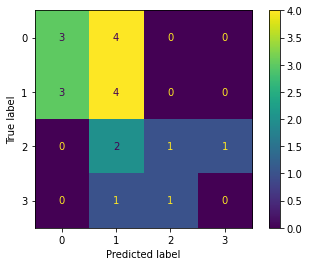

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#SVC

In [40]:
from sklearn import svm

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5588235294117647


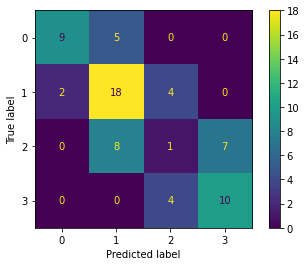

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()